In [3]:
from pyspark.sql import SparkSession
import pyspark.sql.functions as F
from pyspark import SparkFiles

# Creating a SparkSession
spark = SparkSession.builder.appName("Shakespeare") \
                       .getOrCreate()

In [11]:
url_RnJ = 'https://www.gutenberg.org/cache/epub/1513/pg1513.txt'
url_Tempest = 'https://www.gutenberg.org/cache/epub/23042/pg23042.txt'
# url_Hamlet = 'https://www.gutenberg.org/cache/epub/27761/pg27761.txt'
# url_Macbeth = 'https://www.gutenberg.org/cache/epub/1533/pg1533.txt'
# url_Othello = 'https://www.gutenberg.org/cache/epub/1531/pg1531.txt'

spark.sparkContext.addFile(url_RnJ)
spark.sparkContext.addFile(url_Tempest)
# spark.sparkContext.addFile(url_Hamlet)
# spark.sparkContext.addFile(url_Macbeth)
# spark.sparkContext.addFile(url_Othello)


df_RnJ = spark.read.text(SparkFiles.get('pg1513.txt'))
df_Tempest = spark.read.text(SparkFiles.get('pg23042.txt'))
# df_Hamlet = spark.read.text(SparkFiles.get('pg27761.txt'))
# df_Macbeth = spark.read.text(SparkFiles.get('pg1533.txt'))
# df_Othello = spark.read.text(SparkFiles.get('pg1531.txt'))

In [10]:
df_RnJ.show()

+--------------------+
|               value|
+--------------------+
|The Project Guten...|
|                    |
|This ebook is for...|
|most other parts ...|
|whatsoever. You m...|
|of the Project Gu...|
|at www.gutenberg....|
|you will have to ...|
|before using this...|
|                    |
|Title: Romeo and ...|
|                    |
|Author: William S...|
|                    |
|Release date: Nov...|
|                M...|
|                    |
|   Language: English|
|                    |
|Credits: the PG S...|
+--------------------+
only showing top 20 rows



In [30]:
df_cleaned = df_RnJ.select(F.explode(F.split(F.regexp_replace(F.col('value'), r'[^\w\s]', ''), r'\s+')).alias('word')).filter(F.col('word') != '')

# cleaned data
df_cleaned.show(20, truncate=False)  # truncate= Falsee aligns right and shows full column content

+---------+
|word     |
+---------+
|The      |
|Project  |
|Gutenberg|
|eBook    |
|of       |
|Romeo    |
|and      |
|Juliet   |
|This     |
|ebook    |
|is       |
|for      |
|the      |
|use      |
|of       |
|anyone   |
|anywhere |
|in       |
|the      |
|United   |
+---------+
only showing top 20 rows



In [28]:
# Group by word and count occurrences
word_counts = df_cleaned.groupBy('word').count().orderBy(F.col('count').desc())

# Show word counts
word_counts.show(20)

+----+-----+
|word|count|
+----+-----+
| the|  781|
|   I|  580|
| and|  549|
|  to|  534|
|  of|  478|
|   a|  460|
|  in|  359|
|  is|  327|
| you|  323|
|  my|  304|
|that|  285|
|with|  274|
| not|  270|
|  me|  264|
| And|  250|
|thou|  235|
|this|  218|
|  be|  214|
|  it|  203|
| for|  185|
+----+-----+
only showing top 20 rows



In [35]:
total_word_count = df_cleaned.agg(F.sum("word")).collect()[0][0]  # The first [0] accesses the first (and only) row in the list, and the second [0] accesses the first element in the Row, which is the sum of the word counts.
print(total_word_count)

4083394732.0


In [40]:
type(word_counts)

pyspark.sql.dataframe.DataFrame

In [39]:
type(df_cleaned)

pyspark.sql.dataframe.DataFrame

In [43]:
# Convert to pandas df
import pandas as pd
df = word_counts.toPandas()
df.head()

,word,count
0,the,781
1,I,580
2,and,549
3,to,534
4,of,478


In [46]:
pip install wordcloud

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 548.3/548.3 kB 4.8 MB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


In [47]:
from wordcloud import WordCloud

In [49]:
top_50 = dict(df.head(50).values)
top_50

{'the': 781,
 'I': 580,
 'and': 549,
 'to': 534,
 'of': 478,
 'a': 460,
 'in': 359,
 'is': 327,
 'you': 323,
 'my': 304,
 'that': 285,
 'with': 274,
 'not': 270,
 'me': 264,
 'And': 250,
 'thou': 235,
 'this': 218,
 'be': 214,
 'it': 203,
 'for': 185,
 'ROMEO': 167,
 'thy': 151,
 'O': 149,
 'will': 144,
 'her': 142,
 'thee': 137,
 'Romeo': 134,
 'love': 132,
 'as': 130,
 'his': 127,
 'JULIET': 122,
 'have': 122,
 'so': 121,
 'by': 109,
 'or': 108,
 'he': 103,
 'but': 101,
 'all': 100,
 'your': 99,
 'What': 98,
 'CAPULET': 97,
 'him': 96,
 'shall': 96,
 'from': 95,
 'she': 92,
 'NURSE': 91,
 'To': 86,
 'are': 86,
 'do': 85,
 'The': 85}

In [51]:
wordcloud = WordCloud(width=1000, height=500, background_color="white").generate_from_frequencies(top_50)
wordcloud

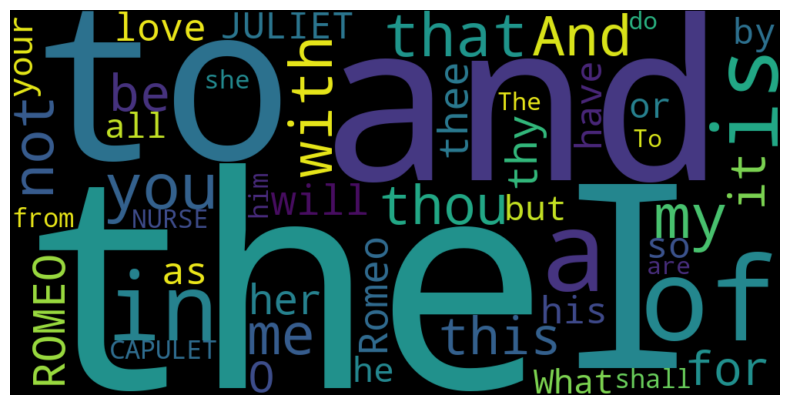

In [53]:
from matplotlib import pyplot as plt
# plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()